In [1]:
!pip install opencv-python
!pip install opencv-contrib-python

In [2]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE 
import os
import cv2
import numpy as np
"""
1- Describing Shape and Features of Dataset

"""
def load_and_preprocess_data(dataset_path, image_size=(256, 256)):
    images = []
    labels = []
    for file_name in os.listdir(dataset_path):
        file_path = os.path.join(dataset_path, file_name)

        # Load image in RGB format (OpenCV loads in BGR by default)
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

        image = cv2.resize(image, image_size, interpolation=cv2.INTER_LANCZOS4)


        images.append(image)
        labels.append(file_name)
    return np.array(images), np.array(labels)

flowers_dataset_path = r"flowers"
images, labels = load_and_preprocess_data(flowers_dataset_path)


In [3]:
images[0].shape #shape of one image  

(256, 256, 3)

In [4]:
images.shape #there are 733 images with size of 256x256

(733, 256, 256, 3)

In [5]:
labels.shape 

(733,)

In [6]:
labels

array(['bougainvillea_00002.jpg', 'bougainvillea_00003.jpg',
       'bougainvillea_00004.jpg', 'bougainvillea_00005.jpg',
       'bougainvillea_00006.jpg', 'bougainvillea_00007.jpg',
       'bougainvillea_00008.jpg', 'bougainvillea_00009.jpg',
       'bougainvillea_00010.jpg', 'bougainvillea_00012.jpg',
       'bougainvillea_00013.jpg', 'bougainvillea_00014.jpg',
       'bougainvillea_00015.jpg', 'bougainvillea_00016.jpg',
       'bougainvillea_00017.jpg', 'bougainvillea_00018.jpg',
       'bougainvillea_00019.jpg', 'bougainvillea_00020.jpg',
       'bougainvillea_00021.jpg', 'bougainvillea_00022.jpg',
       'bougainvillea_00023.jpg', 'bougainvillea_00024.jpg',
       'bougainvillea_00025.jpg', 'bougainvillea_00026.jpg',
       'bougainvillea_00027.jpg', 'bougainvillea_00028.jpg',
       'bougainvillea_00029.jpg', 'bougainvillea_00030.jpg',
       'bougainvillea_00031.jpg', 'bougainvillea_00032.jpg',
       'bougainvillea_00033.jpg', 'bougainvillea_00034.jpg',
       'bougainvillea_00

In [7]:
def categorize(labels):
    categories = []
    for a in range(len(labels)):
        if labels[a][:labels[a].index("_")] not in categories:
            categories.append(labels[a][:labels[a].index("_")])
    
    return categories

In [8]:
categories = categorize(labels) #all types of flowers

In [9]:
categories

['bougainvillea',
 'daisies',
 'gardenias',
 'garden',
 'hibiscus',
 'hydrangeas',
 'lilies',
 'orchids',
 'peonies',
 'tulip']

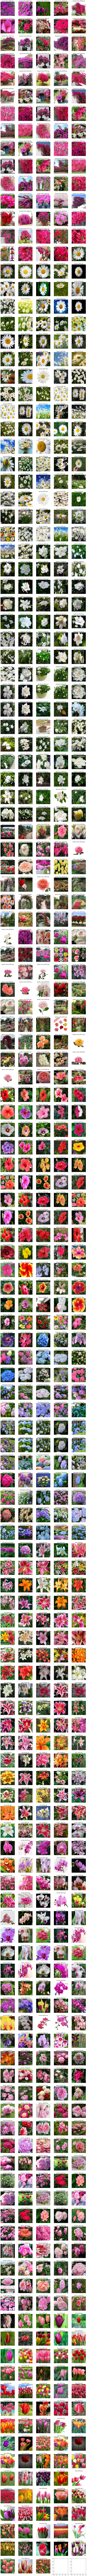

In [10]:
#all images printed with 5 images per row

def visualize_images(images, labels, num_images_per_row=5):

    num_images = len(images)
    num_rows = (num_images + num_images_per_row - 1) // num_images_per_row
    fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(15, num_rows * 3))

    for i in range(num_rows):
        for j in range(num_images_per_row):
            index = i * num_images_per_row + j
            if index < num_images:
                if len(images[index].shape) == 3:
                    axes[i, j].imshow(images[index])
                else:
                    axes[i, j].imshow(images[index][0])
                axes[i, j].axis('off')
                axes[i, j].set_title(labels[index])

    plt.tight_layout()
    plt.show()

visualize_images(images, labels, num_images_per_row=5)

In [11]:
images[0]

array([[[ 82,  11,  91],
        [109,  26, 123],
        [105,   8, 123],
        ...,
        [142,  78, 138],
        [153,  81, 154],
        [150,  77, 157]],

       [[111,  28, 130],
        [110,  19, 132],
        [124,  22, 150],
        ...,
        [132,  60, 136],
        [124,  52, 126],
        [139,  67, 141]],

       [[113,  27, 136],
        [112,  23, 136],
        [108,  15, 132],
        ...,
        [119,  54, 113],
        [130,  62, 129],
        [135,  63, 140]],

       ...,

       [[103,  85,  80],
        [126, 111, 109],
        [119, 101,  99],
        ...,
        [ 34,  27,  35],
        [ 36,  28,  37],
        [ 39,  32,  40]],

       [[121, 108, 101],
        [114, 103,  97],
        [115, 105,  98],
        ...,
        [ 29,  27,  31],
        [ 38,  35,  39],
        [ 34,  29,  35]],

       [[ 98,  89,  78],
        [111, 101,  94],
        [ 86,  77,  68],
        ...,
        [ 71,  70,  75],
        [ 42,  41,  46],
        [ 47,  41,  48]]

In [12]:
"""
2- Setup and Choosing Clustered Algorithms

"""
images = images.reshape(images.shape[0], -1) #flattened

C:\Users\cer79\AppData\Local\Temp\ipykernel_37016\2383375459.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(images[:, 0], images[:, 1], cmap='viridis', marker='o')


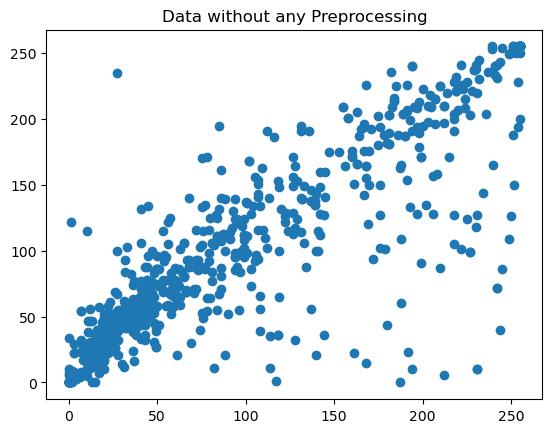

In [13]:
#data when no Scaler is used.
plt.scatter(images[:, 0], images[:, 1], cmap='viridis', marker='o')
plt.title('Data without any Preprocessing')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [15]:
#checking which Scaling type is best fit
scaler = StandardScaler()
scaler.fit(X_train)
X_standart_scaled = scaler.transform(X_train)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_minmax_scaled = scaler.transform(X_train)

C:\Users\cer79\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cer79\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


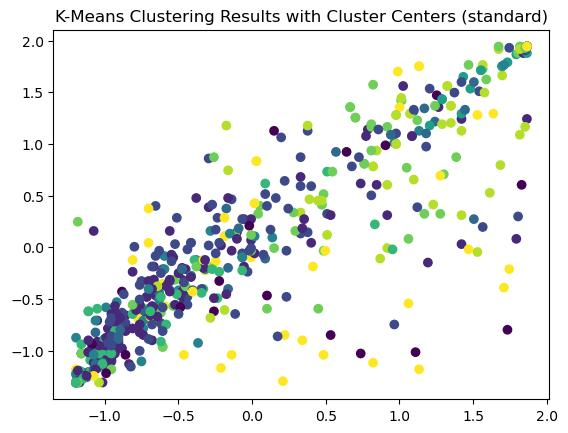

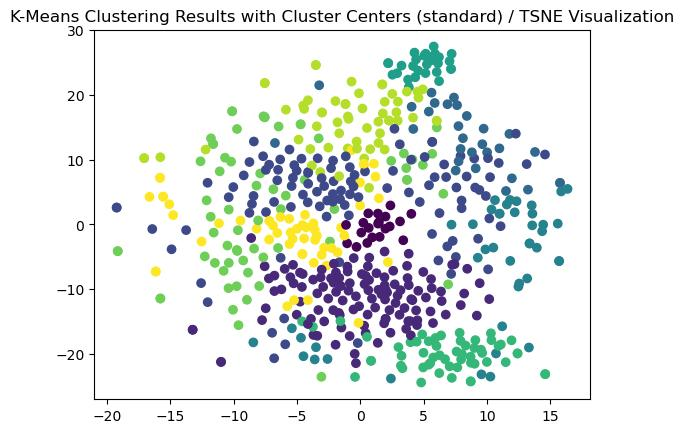

C:\Users\cer79\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cer79\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


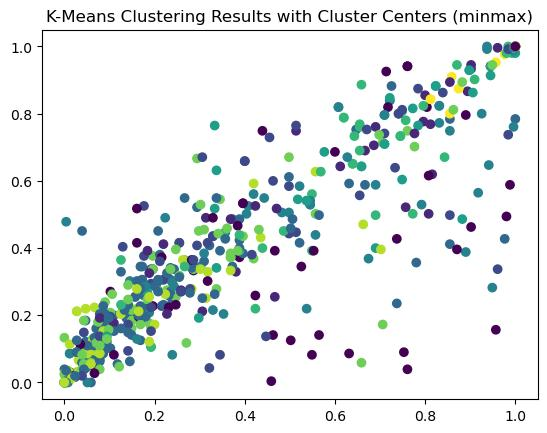

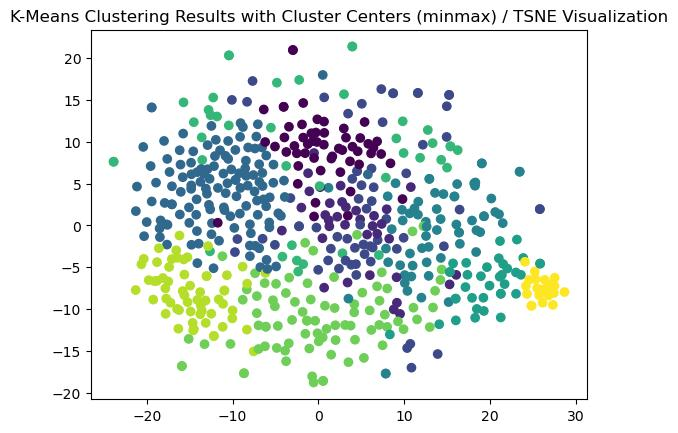

In [16]:
# Controlling K-Means Clustering with both MinMax and Standard Scaler
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_standart_scaled)
predicted_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.scatter(X_standart_scaled[:, 0], X_standart_scaled[:, 1], c=predicted_labels, cmap='viridis', marker='o')

plt.title('K-Means Clustering Results with Cluster Centers (standard)')
plt.show()

tsne = TSNE()
X_tsne = tsne.fit_transform(X_standart_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=predicted_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering Results with Cluster Centers (standard) / TSNE Visualization')
plt.show()

kmeans = KMeans(n_clusters=10)
kmeans.fit(X_minmax_scaled)
predicted_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.scatter(X_minmax_scaled[:, 0], X_minmax_scaled[:, 1], c=predicted_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering Results with Cluster Centers (minmax)')
plt.show()

tsne = TSNE()
X_tsne = tsne.fit_transform(X_minmax_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=predicted_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering Results with Cluster Centers (minmax) / TSNE Visualization')
plt.show()


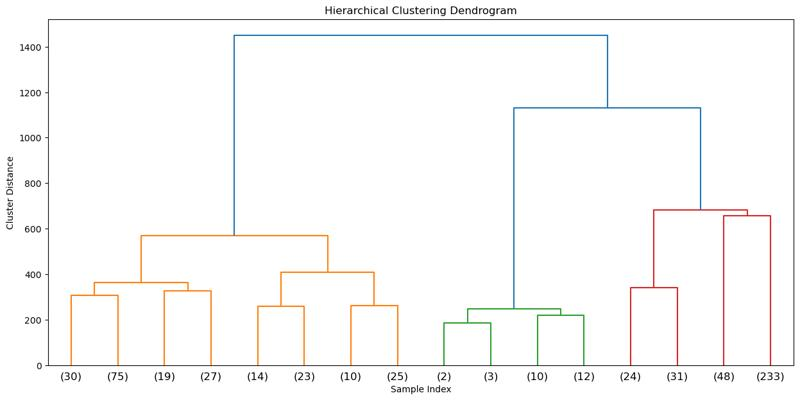

In [17]:
# Showing Dendrogram for Hierarchical Clustering (explained in Report)
agg_cluster = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_cluster.fit_predict(X_minmax_scaled)

linkage_matrix = linkage(X_minmax_scaled, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()


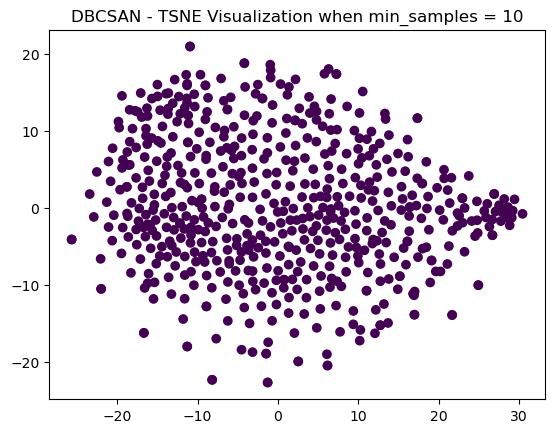

Labels:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

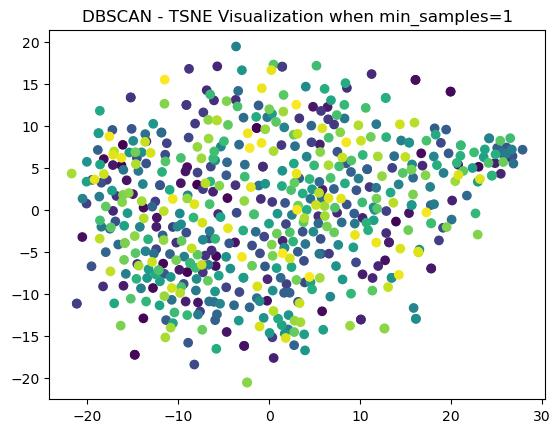

In [18]:
# DBSCAN - min_samples parameter optimization
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan.fit(X_minmax_scaled)
predicted_labels_dbscan = dbscan.labels_

tsne = TSNE()
X_tsne = tsne.fit_transform(X_minmax_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=predicted_labels_dbscan, cmap='viridis', marker='o')
plt.title('DBCSAN - TSNE Visualization when min_samples = 10')
plt.show()
print("Labels:\n" , predicted_labels_dbscan)

dbscan = DBSCAN(eps=1, min_samples=1)
dbscan.fit(X_minmax_scaled)
predicted_labels_dbscan = dbscan.labels_

tsne = TSNE()
X_tsne = tsne.fit_transform(X_minmax_scaled)

# Visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=predicted_labels_dbscan, cmap='viridis', marker='o')
plt.title('DBSCAN - TSNE Visualization when min_samples=1')
plt.show()


Number of clusters  551
Score: 0.11945389421357114


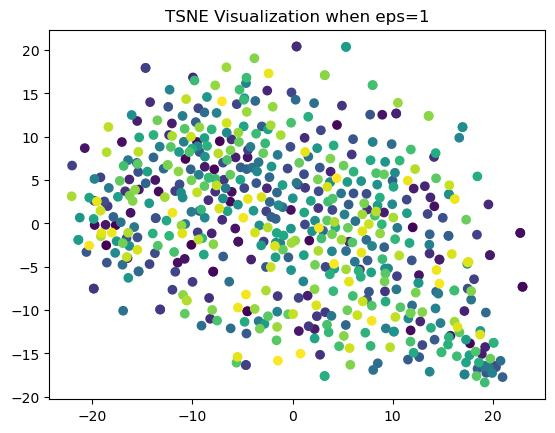

Number of clusters  539
Score: 0.11891030238266136


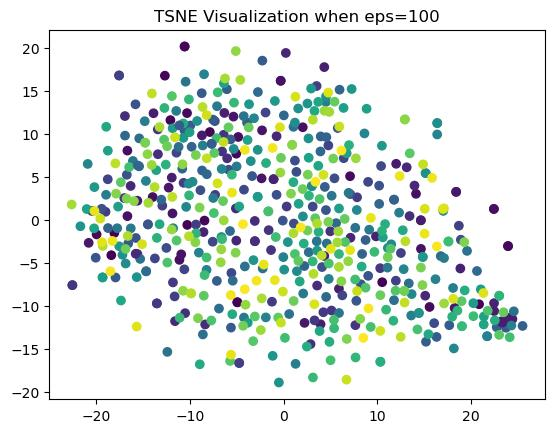

In [19]:
# DBSCAN - eps parameter optimization
dbscan = DBSCAN(eps=1, min_samples=1)
dbscan.fit(X_minmax_scaled)
predicted_labels_dbscan = dbscan.labels_
print("Number of clusters ", len(set(dbscan.labels_)))
tsne = TSNE()
X_tsne = tsne.fit_transform(X_minmax_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=predicted_labels_dbscan, cmap='viridis', marker='o')
plt.title('TSNE Visualization when eps=1')
print("Score:",silhouette_score(X_minmax_scaled, predicted_labels_dbscan))
plt.show()

dbscan = DBSCAN(eps=100, min_samples=1)
dbscan.fit(X_minmax_scaled)
predicted_labels_dbscan = dbscan.labels_
print("Number of clusters ", len(set(dbscan.labels_)))

tsne = TSNE()
X_tsne = tsne.fit_transform(X_minmax_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=predicted_labels_dbscan, cmap='viridis', marker='o')
plt.title('TSNE Visualization when eps=100')
print("Score:", silhouette_score(X_minmax_scaled, predicted_labels_dbscan))
plt.show()


In [20]:
"""
Cluster Algorithms Experiments
"""

'\nCluster Algorithms Experiments\n'

C:\Users\cer79\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cer79\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


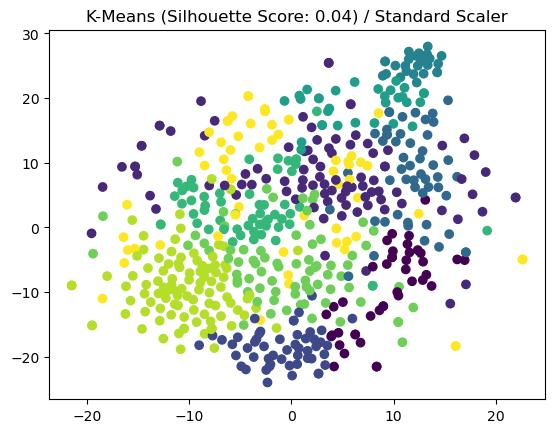

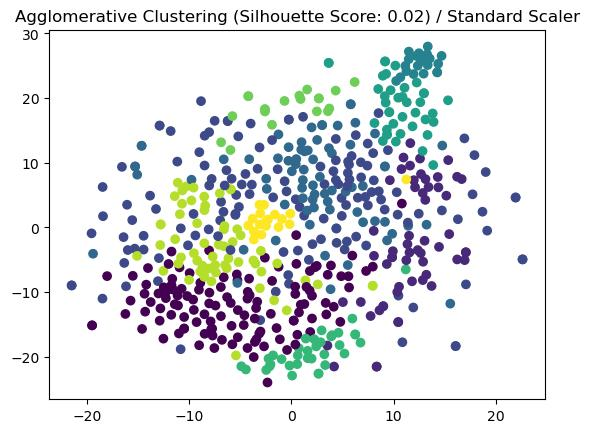

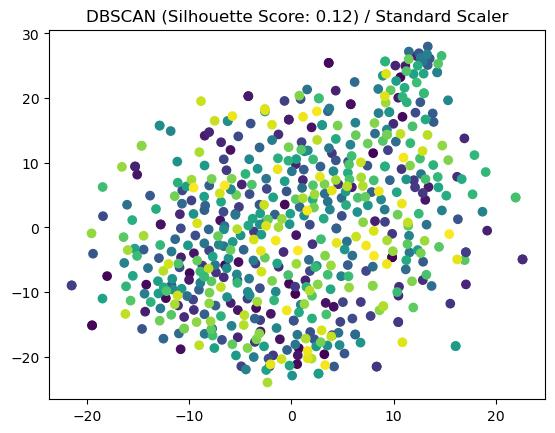

In [21]:
#when Scaler is StandartScaler

# K-Means
kmeans = KMeans(n_clusters=10)
kmeans_labels = kmeans.fit_predict(X_standart_scaled)

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_cluster.fit_predict(X_standart_scaled)

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=1)
dbscan_labels = dbscan.fit_predict(X_standart_scaled)

# silhouette_score for StandardScaler
kmeans_score = silhouette_score(X_standart_scaled, kmeans_labels)
agg_score = silhouette_score(X_standart_scaled, agg_labels)
dbscan_score = silhouette_score(X_standart_scaled, dbscan_labels)


tsne = TSNE()
X_tsne = tsne.fit_transform(X_standart_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'K-Means (Silhouette Score: {kmeans_score:.2f}) / Standard Scaler')
plt.show()

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agg_labels, cmap='viridis')
plt.title(f'Agglomerative Clustering (Silhouette Score: {agg_score:.2f}) / Standard Scaler')
plt.show()

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f'DBSCAN (Silhouette Score: {dbscan_score:.2f}) / Standard Scaler')
plt.show()


C:\Users\cer79\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cer79\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


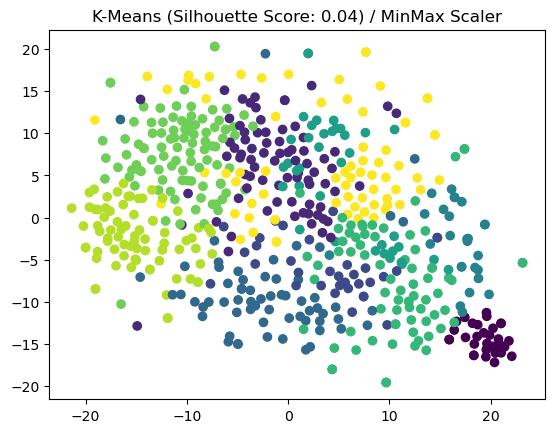

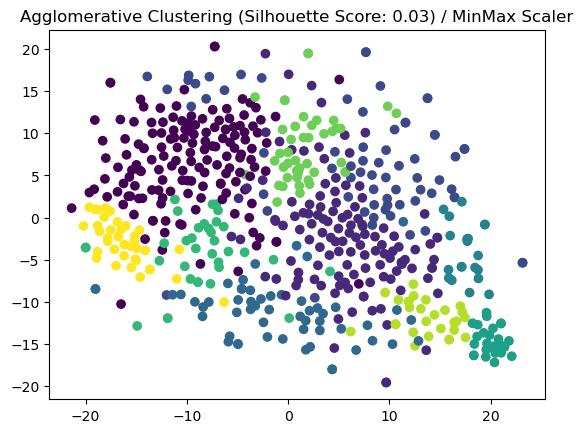

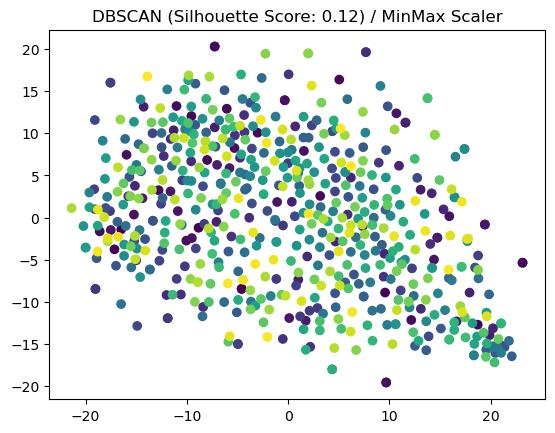

In [22]:
#when Scaler is MinMaxScaler

# K-Means
kmeans = KMeans(n_clusters=10)
kmeans_labels = kmeans.fit_predict(X_minmax_scaled)

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_cluster.fit_predict(X_minmax_scaled)

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=1)
dbscan_labels = dbscan.fit_predict(X_minmax_scaled)

# silhouette_score for MinMaxScaler
kmeans_score = silhouette_score(X_minmax_scaled, kmeans_labels)
agg_score = silhouette_score(X_minmax_scaled, agg_labels)
dbscan_score = silhouette_score(X_minmax_scaled, dbscan_labels)


tsne = TSNE()
X_tsne = tsne.fit_transform(X_minmax_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'K-Means (Silhouette Score: {kmeans_score:.2f}) / MinMax Scaler')
plt.show()


plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agg_labels, cmap='viridis')
plt.title(f'Agglomerative Clustering (Silhouette Score: {agg_score:.2f}) / MinMax Scaler')
plt.show()


plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f'DBSCAN (Silhouette Score: {dbscan_score:.2f}) / MinMax Scaler')
plt.show()


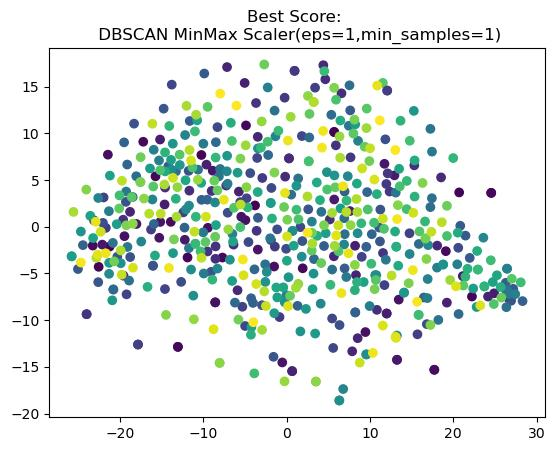

In [23]:
"""
Best Result: DBSCAN with MinMaxScaler
When eps=1 and min_samples = 1
"""

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=1)
dbscan_labels = dbscan.fit_predict(X_minmax_scaled)

tsne = TSNE()
X_tsne = tsne.fit_transform(X_minmax_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f'Best Score: \n DBSCAN MinMax Scaler(eps=1,min_samples=1)')
plt.show()



